In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df=pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [18]:
df=df.drop("Name",axis=1)
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scale=MinMaxScaler()
scale.fit(df[["Age"]])
df["Age"]=scale.transform(df[["Age"]])

scale.fit(df[["Income($)"]])
df["Income($)"]=scale.transform(df[["Income($)"]])

In [21]:
df

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


In [22]:
from sklearn.cluster import KMeans

In [28]:
wcss=[]

for i in range(1,10):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(df)
    km.fit_predict(df)
    wcss.append(km.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


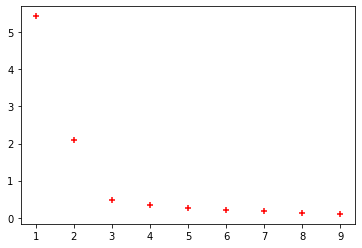

In [29]:
plt.scatter(range(1,10),wcss,marker="+",color="red")

In [30]:
km=KMeans(n_clusters=3,init='k-means++')
km.fit(df)
y_predict=km.fit_predict(df)

In [35]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [31]:
df["cluster"]=y_predict

In [32]:
df

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


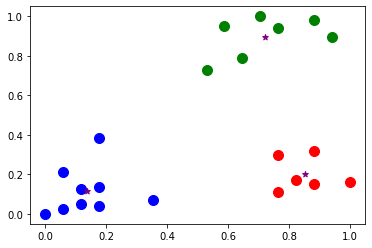

In [37]:
df1=df[df["cluster"]==0]
df2=df[df["cluster"]==1]
df3=df[df["cluster"]==2]

plt.scatter(df1.Age,df1["Income($)"],s=100,color="green")
plt.scatter(df2.Age,df2["Income($)"],s=100,color="blue")
plt.scatter(df3.Age,df3["Income($)"],s=100,color="red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*")